In [1]:
import torchvision
import torch
import torch.nn as nn
import numpy as np

# Dloader

In [2]:
prepr = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224, 224)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                     std=[0.5, 0.5, 0.5])
])
voc = torchvision.datasets.VOCDetection(root='data/train',
                                        image_set='train',
                                        transform=prepr)

names = ['person', 
         'bird', 'cat', 'cow', 'dog', 'horse', 'sheep', 
         'aeroplane', 'bicycle', 'boat', 'bus', 'car', 'motorbike', 'train', 
         'bottle', 'chair', 'diningtable', 'pottedplant', 'sofa', 'tvmonitor']
nums = np.arange(20)
classes = {names[i]:nums[i] for i in range(20)}

def collate_fn(batch):
    return tuple(zip(*batch))

dloader = torch.utils.data.DataLoader(dataset=voc, batch_size=256, collate_fn=collate_fn)

# Main train

In [3]:
from model import Detector
from geometry import iou
from geometry import cnt_box
from geometry import to_target
from loss import criterion

In [4]:
model = Detector().cuda()

In [5]:
def train(optimizer, dloader, num_epochs):
    global model, epochs
    for epoch in range(num_epochs):
        for num, (ims, anns) in enumerate(dloader):
            bsize = len(ims)

            x = torch.stack(ims).cuda()
            predict = model(x).reshape(-1, 7, 7, 30)
            y = to_target([anns[i]['annotation'] for i in range(bsize)], predict)

            optimizer.zero_grad()
            loss = criterion(predict, y)
            loss.backward()
            optimizer.step()

            print('Epoch {} Step {} Loss {}'. format(epoch + epochs, num, loss.detach()))

In [6]:
%%time
## NVIDIA TESLA V100
epochs = 0

optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
train(optimizer, dloader, 100)
epochs += 100

/home/ubuntu/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448234945/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch 0 Step 0 Loss 22.971403121948242
Epoch 0 Step 1 Loss 25.726900100708008
Epoch 0 Step 2 Loss 19.639484405517578
Epoch 0 Step 3 Loss 17.6795711517334
Epoch 0 Step 4 Loss 18.096179962158203
Epoch 0 Step 5 Loss 15.532023429870605
Epoch 0 Step 6 Loss 15.750324249267578
Epoch 0 Step 7 Loss 14.92106819152832
Epoch 0 Step 8 Loss 12.228466033935547
Epoch 0 Step 9 Loss 10.820311546325684
Epoch 0 Step 10 Loss 10.744119644165039
Epoch 0 Step 11 Loss 10.393707275390625
Epoch 0 Step 12 Loss 11.140053749084473
Epoch 0 Step 13 Loss 8.18679428100586
Epoch 0 Step 14 Loss 8.97224235534668
Epoch 0 Step 15 Loss 8.713828086853027
Epoch 0 Step 16 Loss 7.94036340713501
Epoch 0 Step 17 Loss 8.250905990600586
Epoch 0 Step 18 Loss 8.216998100280762
Epoch 0 Step 19 Loss 8.922107696533203
Epoch 0 Step 20 Loss 12.367058753967285
Epoch 0 Step 21 Loss 10.219696998596191
Epoch 0 Step 22 Loss 12.605779647827148
Epoch 1 Step 0 Loss 7.659372329711914
Epoch 1 Step 1 Loss 9.602859497070312
Epoch 1 Step 2 Loss 7.93007

Epoch 9 Step 4 Loss 3.6464145183563232
Epoch 9 Step 5 Loss 3.2224814891815186
Epoch 9 Step 6 Loss 3.573159694671631
Epoch 9 Step 7 Loss 3.6746113300323486
Epoch 9 Step 8 Loss 3.072784185409546
Epoch 9 Step 9 Loss 3.0043869018554688
Epoch 9 Step 10 Loss 2.819242238998413
Epoch 9 Step 11 Loss 2.811476945877075
Epoch 9 Step 12 Loss 3.1248795986175537
Epoch 9 Step 13 Loss 2.5691487789154053
Epoch 9 Step 14 Loss 2.781299591064453
Epoch 9 Step 15 Loss 2.7335469722747803
Epoch 9 Step 16 Loss 2.5263373851776123
Epoch 9 Step 17 Loss 2.699544668197632
Epoch 9 Step 18 Loss 2.738927125930786
Epoch 9 Step 19 Loss 2.9982683658599854
Epoch 9 Step 20 Loss 4.010209560394287
Epoch 9 Step 21 Loss 3.502073049545288
Epoch 9 Step 22 Loss 3.5288171768188477
Epoch 10 Step 0 Loss 2.7558443546295166
Epoch 10 Step 1 Loss 3.2763895988464355
Epoch 10 Step 2 Loss 2.920412540435791
Epoch 10 Step 3 Loss 2.8636791706085205
Epoch 10 Step 4 Loss 3.48994517326355
Epoch 10 Step 5 Loss 3.0504982471466064
Epoch 10 Step 6 Lo

Epoch 18 Step 2 Loss 1.6961692571640015
Epoch 18 Step 3 Loss 1.8135942220687866
Epoch 18 Step 4 Loss 2.1401045322418213
Epoch 18 Step 5 Loss 1.9249581098556519
Epoch 18 Step 6 Loss 2.263594388961792
Epoch 18 Step 7 Loss 2.1564836502075195
Epoch 18 Step 8 Loss 1.8417731523513794
Epoch 18 Step 9 Loss 1.7192585468292236
Epoch 18 Step 10 Loss 1.686704158782959
Epoch 18 Step 11 Loss 1.5882649421691895
Epoch 18 Step 12 Loss 1.8468302488327026
Epoch 18 Step 13 Loss 1.4998561143875122
Epoch 18 Step 14 Loss 1.6420563459396362
Epoch 18 Step 15 Loss 1.5442566871643066
Epoch 18 Step 16 Loss 1.4081960916519165
Epoch 18 Step 17 Loss 1.5525082349777222
Epoch 18 Step 18 Loss 1.589631199836731
Epoch 18 Step 19 Loss 1.780461072921753
Epoch 18 Step 20 Loss 2.4087820053100586
Epoch 18 Step 21 Loss 2.0337235927581787
Epoch 18 Step 22 Loss 2.129234552383423
Epoch 19 Step 0 Loss 1.5798660516738892
Epoch 19 Step 1 Loss 1.9318242073059082
Epoch 19 Step 2 Loss 1.6784824132919312
Epoch 19 Step 3 Loss 1.849856138

Epoch 26 Step 22 Loss 2.8183555603027344
Epoch 27 Step 0 Loss 1.094092845916748
Epoch 27 Step 1 Loss 1.3363983631134033
Epoch 27 Step 2 Loss 1.186452031135559
Epoch 27 Step 3 Loss 1.1849664449691772
Epoch 27 Step 4 Loss 1.6596946716308594
Epoch 27 Step 5 Loss 1.3665761947631836
Epoch 27 Step 6 Loss 1.7217472791671753
Epoch 27 Step 7 Loss 1.6042516231536865
Epoch 27 Step 8 Loss 1.3658238649368286
Epoch 27 Step 9 Loss 1.3045763969421387
Epoch 27 Step 10 Loss 1.2595903873443604
Epoch 27 Step 11 Loss 1.0827631950378418
Epoch 27 Step 12 Loss 1.2492125034332275
Epoch 27 Step 13 Loss 0.9576809406280518
Epoch 27 Step 14 Loss 1.2155145406723022
Epoch 27 Step 15 Loss 0.9993877410888672
Epoch 27 Step 16 Loss 0.9192919731140137
Epoch 27 Step 17 Loss 1.079262614250183
Epoch 27 Step 18 Loss 1.1957517862319946
Epoch 27 Step 19 Loss 1.1247814893722534
Epoch 27 Step 20 Loss 1.7174242734909058
Epoch 27 Step 21 Loss 1.5378227233886719
Epoch 27 Step 22 Loss 2.2936387062072754
Epoch 28 Step 0 Loss 1.096072

Epoch 35 Step 19 Loss 0.8056639432907104
Epoch 35 Step 20 Loss 1.3615188598632812
Epoch 35 Step 21 Loss 1.0652244091033936
Epoch 35 Step 22 Loss 2.6300177574157715
Epoch 36 Step 0 Loss 0.748221218585968
Epoch 36 Step 1 Loss 1.0714519023895264
Epoch 36 Step 2 Loss 0.8256054520606995
Epoch 36 Step 3 Loss 0.9063922762870789
Epoch 36 Step 4 Loss 1.356086015701294
Epoch 36 Step 5 Loss 0.8877212405204773
Epoch 36 Step 6 Loss 1.335955023765564
Epoch 36 Step 7 Loss 1.0462936162948608
Epoch 36 Step 8 Loss 1.363135576248169
Epoch 36 Step 9 Loss 0.8908217549324036
Epoch 36 Step 10 Loss 0.9703601598739624
Epoch 36 Step 11 Loss 0.7911278009414673
Epoch 36 Step 12 Loss 1.256218671798706
Epoch 36 Step 13 Loss 0.7054458856582642
Epoch 36 Step 14 Loss 0.8501622080802917
Epoch 36 Step 15 Loss 0.6881181597709656
Epoch 36 Step 16 Loss 0.6413825750350952
Epoch 36 Step 17 Loss 0.8519408106803894
Epoch 36 Step 18 Loss 0.7939798831939697
Epoch 36 Step 19 Loss 0.8270054459571838
Epoch 36 Step 20 Loss 1.3192205

Epoch 44 Step 15 Loss 0.6719105839729309
Epoch 44 Step 16 Loss 0.6080448627471924
Epoch 44 Step 17 Loss 0.773360550403595
Epoch 44 Step 18 Loss 0.774953305721283
Epoch 44 Step 19 Loss 0.7140656113624573
Epoch 44 Step 20 Loss 1.0969234704971313
Epoch 44 Step 21 Loss 0.7839688062667847
Epoch 44 Step 22 Loss 2.3481051921844482
Epoch 45 Step 0 Loss 0.6124089360237122
Epoch 45 Step 1 Loss 0.8772169947624207
Epoch 45 Step 2 Loss 0.976333737373352
Epoch 45 Step 3 Loss 0.886879563331604
Epoch 45 Step 4 Loss 1.1687906980514526
Epoch 45 Step 5 Loss 1.0034332275390625
Epoch 45 Step 6 Loss 1.3172153234481812
Epoch 45 Step 7 Loss 0.9012439846992493
Epoch 45 Step 8 Loss 0.9813172817230225
Epoch 45 Step 9 Loss 0.649364173412323
Epoch 45 Step 10 Loss 0.7433900833129883
Epoch 45 Step 11 Loss 0.6368719339370728
Epoch 45 Step 12 Loss 0.8393001556396484
Epoch 45 Step 13 Loss 0.5214806199073792
Epoch 45 Step 14 Loss 0.817450761795044
Epoch 45 Step 15 Loss 0.624732494354248
Epoch 45 Step 16 Loss 0.597549200

Epoch 53 Step 11 Loss 0.9907546043395996
Epoch 53 Step 12 Loss 1.0400866270065308
Epoch 53 Step 13 Loss 0.7867109775543213
Epoch 53 Step 14 Loss 1.1981011629104614
Epoch 53 Step 15 Loss 0.8569724559783936
Epoch 53 Step 16 Loss 0.8069696426391602
Epoch 53 Step 17 Loss 0.9831465482711792
Epoch 53 Step 18 Loss 1.0776700973510742
Epoch 53 Step 19 Loss 1.120537519454956
Epoch 53 Step 20 Loss 1.4920700788497925
Epoch 53 Step 21 Loss 1.401364803314209
Epoch 53 Step 22 Loss 1.5764113664627075
Epoch 54 Step 0 Loss 0.8711660504341125
Epoch 54 Step 1 Loss 1.1638412475585938
Epoch 54 Step 2 Loss 0.8796517252922058
Epoch 54 Step 3 Loss 1.0942634344100952
Epoch 54 Step 4 Loss 1.115734338760376
Epoch 54 Step 5 Loss 1.0245718955993652
Epoch 54 Step 6 Loss 1.0909008979797363
Epoch 54 Step 7 Loss 1.1730351448059082
Epoch 54 Step 8 Loss 0.9414883255958557
Epoch 54 Step 9 Loss 0.838327169418335
Epoch 54 Step 10 Loss 0.9027857780456543
Epoch 54 Step 11 Loss 0.8141824007034302
Epoch 54 Step 12 Loss 0.851923

Epoch 62 Step 7 Loss 1.2571629285812378
Epoch 62 Step 8 Loss 0.9789940118789673
Epoch 62 Step 9 Loss 0.6063100695610046
Epoch 62 Step 10 Loss 0.6136618256568909
Epoch 62 Step 11 Loss 0.42193567752838135
Epoch 62 Step 12 Loss 0.5216233730316162
Epoch 62 Step 13 Loss 0.44302093982696533
Epoch 62 Step 14 Loss 0.7538704872131348
Epoch 62 Step 15 Loss 0.6352720856666565
Epoch 62 Step 16 Loss 0.6038761734962463
Epoch 62 Step 17 Loss 0.8335403800010681
Epoch 62 Step 18 Loss 0.9042902588844299
Epoch 62 Step 19 Loss 1.0065724849700928
Epoch 62 Step 20 Loss 1.3523778915405273
Epoch 62 Step 21 Loss 1.0229465961456299
Epoch 62 Step 22 Loss 1.4677941799163818
Epoch 63 Step 0 Loss 0.6249386668205261
Epoch 63 Step 1 Loss 0.883129894733429
Epoch 63 Step 2 Loss 0.5845983624458313
Epoch 63 Step 3 Loss 0.7911438941955566
Epoch 63 Step 4 Loss 0.8415355086326599
Epoch 63 Step 5 Loss 1.3692688941955566
Epoch 63 Step 6 Loss 1.3458396196365356
Epoch 63 Step 7 Loss 1.5887665748596191
Epoch 63 Step 8 Loss 1.297

Epoch 71 Step 4 Loss 1.4778910875320435
Epoch 71 Step 5 Loss 1.5769108533859253
Epoch 71 Step 6 Loss 1.9076718091964722
Epoch 71 Step 7 Loss 1.9386616945266724
Epoch 71 Step 8 Loss 1.7034918069839478
Epoch 71 Step 9 Loss 1.404569387435913
Epoch 71 Step 10 Loss 1.3762980699539185
Epoch 71 Step 11 Loss 1.2616488933563232
Epoch 71 Step 12 Loss 1.1707717180252075
Epoch 71 Step 13 Loss 0.6710094809532166
Epoch 71 Step 14 Loss 0.7244845628738403
Epoch 71 Step 15 Loss 0.5980916619300842
Epoch 71 Step 16 Loss 0.48538461327552795
Epoch 71 Step 17 Loss 0.6995062828063965
Epoch 71 Step 18 Loss 0.8239768147468567
Epoch 71 Step 19 Loss 0.9916369318962097
Epoch 71 Step 20 Loss 1.777283787727356
Epoch 71 Step 21 Loss 1.3708022832870483
Epoch 71 Step 22 Loss 1.6737536191940308
Epoch 72 Step 0 Loss 0.8438011407852173
Epoch 72 Step 1 Loss 1.1682020425796509
Epoch 72 Step 2 Loss 0.7010589241981506
Epoch 72 Step 3 Loss 0.8378165364265442
Epoch 72 Step 4 Loss 1.0233193635940552
Epoch 72 Step 5 Loss 1.03948

Epoch 79 Step 22 Loss 0.6789587140083313
Epoch 80 Step 0 Loss 0.2715851068496704
Epoch 80 Step 1 Loss 0.5134490132331848
Epoch 80 Step 2 Loss 0.29654642939567566
Epoch 80 Step 3 Loss 0.422435462474823
Epoch 80 Step 4 Loss 0.4339408874511719
Epoch 80 Step 5 Loss 0.37588968873023987
Epoch 80 Step 6 Loss 0.45243921875953674
Epoch 80 Step 7 Loss 0.4169963300228119
Epoch 80 Step 8 Loss 0.41617101430892944
Epoch 80 Step 9 Loss 0.2386840134859085
Epoch 80 Step 10 Loss 0.29836976528167725
Epoch 80 Step 11 Loss 0.23616084456443787
Epoch 80 Step 12 Loss 0.36136695742607117
Epoch 80 Step 13 Loss 0.29359886050224304
Epoch 80 Step 14 Loss 0.43517279624938965
Epoch 80 Step 15 Loss 0.2654608488082886
Epoch 80 Step 16 Loss 0.2030269354581833
Epoch 80 Step 17 Loss 0.4069195091724396
Epoch 80 Step 18 Loss 0.2850258946418762
Epoch 80 Step 19 Loss 0.25702381134033203
Epoch 80 Step 20 Loss 0.6344642043113708
Epoch 80 Step 21 Loss 0.5046111345291138
Epoch 80 Step 22 Loss 0.6522666215896606
Epoch 81 Step 0 L

Epoch 88 Step 16 Loss 0.16858580708503723
Epoch 88 Step 17 Loss 0.2531737983226776
Epoch 88 Step 18 Loss 0.2898857295513153
Epoch 88 Step 19 Loss 0.24266952276229858
Epoch 88 Step 20 Loss 0.5198413133621216
Epoch 88 Step 21 Loss 0.4979475736618042
Epoch 88 Step 22 Loss 0.9510599374771118
Epoch 89 Step 0 Loss 0.21587437391281128
Epoch 89 Step 1 Loss 0.39576461911201477
Epoch 89 Step 2 Loss 0.2455141395330429
Epoch 89 Step 3 Loss 0.3685169816017151
Epoch 89 Step 4 Loss 0.3621213734149933
Epoch 89 Step 5 Loss 0.46371057629585266
Epoch 89 Step 6 Loss 0.4636036157608032
Epoch 89 Step 7 Loss 0.5129161477088928
Epoch 89 Step 8 Loss 0.33828288316726685
Epoch 89 Step 9 Loss 0.20368146896362305
Epoch 89 Step 10 Loss 0.3659086227416992
Epoch 89 Step 11 Loss 0.22961337864398956
Epoch 89 Step 12 Loss 0.2676718533039093
Epoch 89 Step 13 Loss 0.18280716240406036
Epoch 89 Step 14 Loss 0.3353457748889923
Epoch 89 Step 15 Loss 0.34527266025543213
Epoch 89 Step 16 Loss 0.16398490965366364
Epoch 89 Step 1

Epoch 97 Step 10 Loss 0.27594831585884094
Epoch 97 Step 11 Loss 0.3386555016040802
Epoch 97 Step 12 Loss 0.3155994713306427
Epoch 97 Step 13 Loss 0.21442276239395142
Epoch 97 Step 14 Loss 0.39919036626815796
Epoch 97 Step 15 Loss 0.34188297390937805
Epoch 97 Step 16 Loss 0.24245837330818176
Epoch 97 Step 17 Loss 0.2771008610725403
Epoch 97 Step 18 Loss 0.2635619342327118
Epoch 97 Step 19 Loss 0.26474136114120483
Epoch 97 Step 20 Loss 0.46567341685295105
Epoch 97 Step 21 Loss 0.46264004707336426
Epoch 97 Step 22 Loss 0.8588491082191467
Epoch 98 Step 0 Loss 0.2524677813053131
Epoch 98 Step 1 Loss 0.5170429348945618
Epoch 98 Step 2 Loss 0.4297380745410919
Epoch 98 Step 3 Loss 0.382029265165329
Epoch 98 Step 4 Loss 0.4893781244754791
Epoch 98 Step 5 Loss 0.4006841480731964
Epoch 98 Step 6 Loss 0.6923037767410278
Epoch 98 Step 7 Loss 0.5280199646949768
Epoch 98 Step 8 Loss 0.37371528148651123
Epoch 98 Step 9 Loss 0.24205130338668823
Epoch 98 Step 10 Loss 0.3567228615283966
Epoch 98 Step 11 

In [17]:
torch.save(model.state_dict(), 'network2')

# Tuning

In [6]:
model.load_state_dict(torch.load("network2"))

<All keys matched successfully>

In [7]:
%%time

epochs = 100
optimizer = torch.optim.Adam(model.parameters(), lr=1e-6)
train(optimizer, dloader, 40)
epochs += 40

/home/ubuntu/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448234945/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch 100 Step 0 Loss 0.2379019409418106
Epoch 100 Step 1 Loss 0.5263462662696838
Epoch 100 Step 2 Loss 0.4739440083503723
Epoch 100 Step 3 Loss 0.32298997044563293
Epoch 100 Step 4 Loss 0.41071781516075134
Epoch 100 Step 5 Loss 0.30533266067504883
Epoch 100 Step 6 Loss 0.583572268486023
Epoch 100 Step 7 Loss 0.44641581177711487
Epoch 100 Step 8 Loss 0.33840233087539673
Epoch 100 Step 9 Loss 0.191432386636734
Epoch 100 Step 10 Loss 0.37388214468955994
Epoch 100 Step 11 Loss 0.31362831592559814
Epoch 100 Step 12 Loss 0.2918403744697571
Epoch 100 Step 13 Loss 0.21268606185913086
Epoch 100 Step 14 Loss 0.3550170063972473
Epoch 100 Step 15 Loss 0.4692486822605133
Epoch 100 Step 16 Loss 0.1970507800579071
Epoch 100 Step 17 Loss 0.2719257175922394
Epoch 100 Step 18 Loss 0.22459188103675842
Epoch 100 Step 19 Loss 0.21807833015918732
Epoch 100 Step 20 Loss 0.3988631069660187
Epoch 100 Step 21 Loss 0.42425185441970825
Epoch 100 Step 22 Loss 0.7707703709602356
Epoch 101 Step 0 Loss 0.25723111629

Epoch 108 Step 11 Loss 0.18124911189079285
Epoch 108 Step 12 Loss 0.20175489783287048
Epoch 108 Step 13 Loss 0.11466913670301437
Epoch 108 Step 14 Loss 0.22820580005645752
Epoch 108 Step 15 Loss 0.3232390284538269
Epoch 108 Step 16 Loss 0.11008299142122269
Epoch 108 Step 17 Loss 0.16243691742420197
Epoch 108 Step 18 Loss 0.1620332896709442
Epoch 108 Step 19 Loss 0.1479942947626114
Epoch 108 Step 20 Loss 0.27626833319664
Epoch 108 Step 21 Loss 0.2830082178115845
Epoch 108 Step 22 Loss 0.49920138716697693
Epoch 109 Step 0 Loss 0.1405159831047058
Epoch 109 Step 1 Loss 0.28967273235321045
Epoch 109 Step 2 Loss 0.28056636452674866
Epoch 109 Step 3 Loss 0.19655102491378784
Epoch 109 Step 4 Loss 0.3002299964427948
Epoch 109 Step 5 Loss 0.19480352103710175
Epoch 109 Step 6 Loss 0.3984544575214386
Epoch 109 Step 7 Loss 0.2773178219795227
Epoch 109 Step 8 Loss 0.23976236581802368
Epoch 109 Step 9 Loss 0.12174461036920547
Epoch 109 Step 10 Loss 0.24777032434940338
Epoch 109 Step 11 Loss 0.1739401

Epoch 116 Step 22 Loss 0.3740750253200531
Epoch 117 Step 0 Loss 0.12802785634994507
Epoch 117 Step 1 Loss 0.19300228357315063
Epoch 117 Step 2 Loss 0.2261573076248169
Epoch 117 Step 3 Loss 0.1702621728181839
Epoch 117 Step 4 Loss 0.2802548408508301
Epoch 117 Step 5 Loss 0.16156017780303955
Epoch 117 Step 6 Loss 0.34361281991004944
Epoch 117 Step 7 Loss 0.25208377838134766
Epoch 117 Step 8 Loss 0.21678070724010468
Epoch 117 Step 9 Loss 0.11163441836833954
Epoch 117 Step 10 Loss 0.21857796609401703
Epoch 117 Step 11 Loss 0.1323443502187729
Epoch 117 Step 12 Loss 0.16448691487312317
Epoch 117 Step 13 Loss 0.09597023576498032
Epoch 117 Step 14 Loss 0.2043313980102539
Epoch 117 Step 15 Loss 0.2004852145910263
Epoch 117 Step 16 Loss 0.09266793727874756
Epoch 117 Step 17 Loss 0.12941335141658783
Epoch 117 Step 18 Loss 0.1494295597076416
Epoch 117 Step 19 Loss 0.12744630873203278
Epoch 117 Step 20 Loss 0.22728505730628967
Epoch 117 Step 21 Loss 0.24152027070522308
Epoch 117 Step 22 Loss 0.3681

Epoch 125 Step 9 Loss 0.10391519218683243
Epoch 125 Step 10 Loss 0.20020346343517303
Epoch 125 Step 11 Loss 0.11357332766056061
Epoch 125 Step 12 Loss 0.12568406760692596
Epoch 125 Step 13 Loss 0.09006959199905396
Epoch 125 Step 14 Loss 0.19716399908065796
Epoch 125 Step 15 Loss 0.1229933351278305
Epoch 125 Step 16 Loss 0.08756326138973236
Epoch 125 Step 17 Loss 0.12015817314386368
Epoch 125 Step 18 Loss 0.14414170384407043
Epoch 125 Step 19 Loss 0.12036410719156265
Epoch 125 Step 20 Loss 0.2367875725030899
Epoch 125 Step 21 Loss 0.22416169941425323
Epoch 125 Step 22 Loss 0.31649142503738403
Epoch 126 Step 0 Loss 0.12040746957063675
Epoch 126 Step 1 Loss 0.16010189056396484
Epoch 126 Step 2 Loss 0.14822044968605042
Epoch 126 Step 3 Loss 0.1727442443370819
Epoch 126 Step 4 Loss 0.2628260850906372
Epoch 126 Step 5 Loss 0.1957663893699646
Epoch 126 Step 6 Loss 0.3044836223125458
Epoch 126 Step 7 Loss 0.2458333671092987
Epoch 126 Step 8 Loss 0.19791778922080994
Epoch 126 Step 9 Loss 0.1034

Epoch 133 Step 19 Loss 0.12185944616794586
Epoch 133 Step 20 Loss 0.21843771636486053
Epoch 133 Step 21 Loss 0.21985551714897156
Epoch 133 Step 22 Loss 0.3095875382423401
Epoch 134 Step 0 Loss 0.11656850576400757
Epoch 134 Step 1 Loss 0.1523350030183792
Epoch 134 Step 2 Loss 0.12863770127296448
Epoch 134 Step 3 Loss 0.15134494006633759
Epoch 134 Step 4 Loss 0.25543197989463806
Epoch 134 Step 5 Loss 0.14537271857261658
Epoch 134 Step 6 Loss 0.2941928505897522
Epoch 134 Step 7 Loss 0.28391724824905396
Epoch 134 Step 8 Loss 0.18596233427524567
Epoch 134 Step 9 Loss 0.10003582388162613
Epoch 134 Step 10 Loss 0.184474915266037
Epoch 134 Step 11 Loss 0.10245168954133987
Epoch 134 Step 12 Loss 0.11769905686378479
Epoch 134 Step 13 Loss 0.08430221676826477
Epoch 134 Step 14 Loss 0.18601343035697937
Epoch 134 Step 15 Loss 0.10764537006616592
Epoch 134 Step 16 Loss 0.08418687433004379
Epoch 134 Step 17 Loss 0.145116925239563
Epoch 134 Step 18 Loss 0.13886384665966034
Epoch 134 Step 19 Loss 0.120

# Demo

In [8]:
from PIL import Image, ImageDraw

In [9]:
def show_box(xmax, xmin, ymax, ymin, im):
    width, height = im.size
    
    x1 = int(width * xmax)
    x0 = int(width * xmin)
    y1 = int(height * ymax)
    y0 = int(height * ymin)
    
    draw = ImageDraw.Draw(im)
    draw.rectangle([x0, y0, x1, y1], outline='blue')
    
    return im

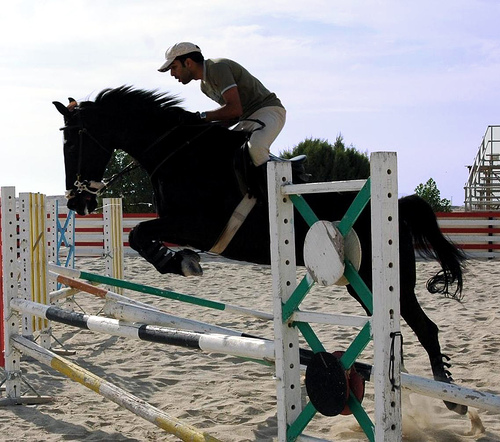

In [15]:
voc_demo = torchvision.datasets.VOCDetection(root='data/train',
                                             image_set='train')
                                             # transform=prepr)

tmp = voc_demo.__getitem__(0)[0]
tmp

In [11]:
tmp_tens = voc.__getitem__(0)[0].reshape(-1, 3, 224, 224).cuda()
predict = model(tmp_tens)

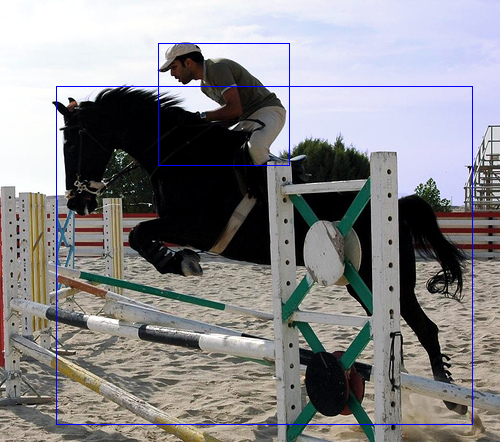

In [16]:
detected = predict[0, (predict[0, :, :, 8] > 0.9)]
coords = detected[:, :4]

for coord in coords:
    box = cnt_box(coord)
    tmp = show_box(*box, tmp)
    
detected = predict[0, (predict[0, :, :, 9] > 0.9)]
coords = detected[:, 4:8]

for coord in coords:
    box = cnt_box(coord)
    tmp = show_box(*box, tmp)
    
tmp